In [1]:
import sys
sys.path.append('../../src/data')
sys.path.append('../../src/models')
sys.path.append('../../src/visualization')

from convert_gtif_to_8bit import convert_gtif_to_8bit
from segmentation import SegmentationModel as Model
from visualize_segmentation import overlay_mask

/opt/conda/envs/py3.6/lib/python3.6/site-packages/cupy/core/fusion.py:659: FutureWarning: cupy.core.fusion is experimental. The interface can change in the future.
  util.experimental('cupy.core.fusion')


In [2]:
import os
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Image.MAX_IMAGE_PIXELS = 10000000000

In [3]:
# Convert src mosaic from 16bit-tif to 8bit-tif format.
src_mosaic_dir = "../../data/3-Band"
mosaic_dir = "../../data/3-Band_8bit"

if not os.path.exists(mosaic_dir):
    os.makedirs(mosaic_dir)
    
    mosaics = os.listdir(src_mosaic_dir)
    for mosaic in mosaics:
        src = os.path.join(src_mosaic_dir, mosaic)
        dst = os.path.join(mosaic_dir, mosaic)
        
        convert_gtif_to_8bit(src, dst)

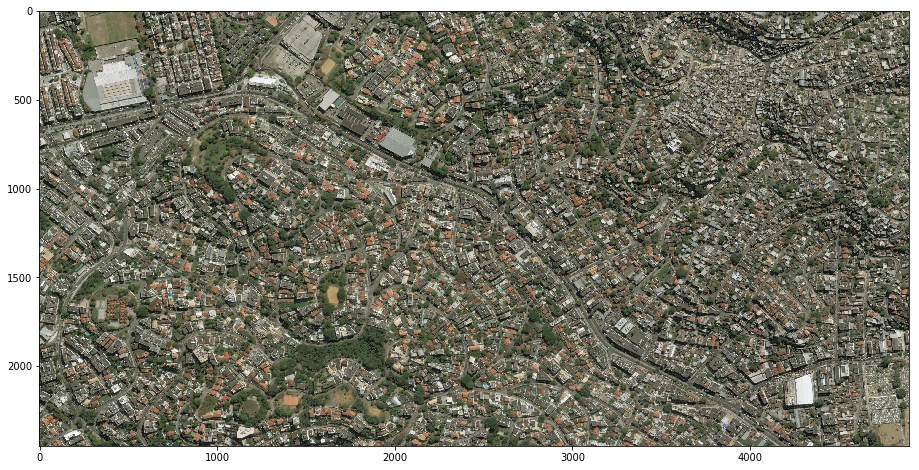

In [4]:
# Pick-up one from converted 8bit-tif mosaics and show.

def get_mosaic(path, zoom_x=1.0, zoom_y=1.0):
    mosaic = np.array(Image.open(path))
    
    # Crop center of the mosaic to see details of the image.
    h, w, _ = mosaic.shape
    crop_y = int(float(h) / 2.0 * (1.0 - 1.0 / zoom_y))
    crop_x = int(float(w) / 2.0 * (1.0 - 1.0 / zoom_x))
    mosaic_cropped = mosaic[crop_y:-crop_y, crop_x:-crop_x]
    
    return mosaic_cropped
    

mosaic_path = os.path.join(mosaic_dir, "013022232300.tif")
mosaic = get_mosaic(mosaic_path, zoom_x=4.0, zoom_y=8.0)

plt.figure(figsize=(16,8))
plt.imshow(mosaic)

In [5]:
# Load trained model
# Modify the the paths based on your trained model location if needed.
mean = np.load("../../data/dataSplit/mean.npy")
model = Model("../../models/logs/model_iter_14878", mean)

In [6]:
# Apply segmentaion to mosai image
score = model.apply_segmentation_to_mosaic(mosaic)

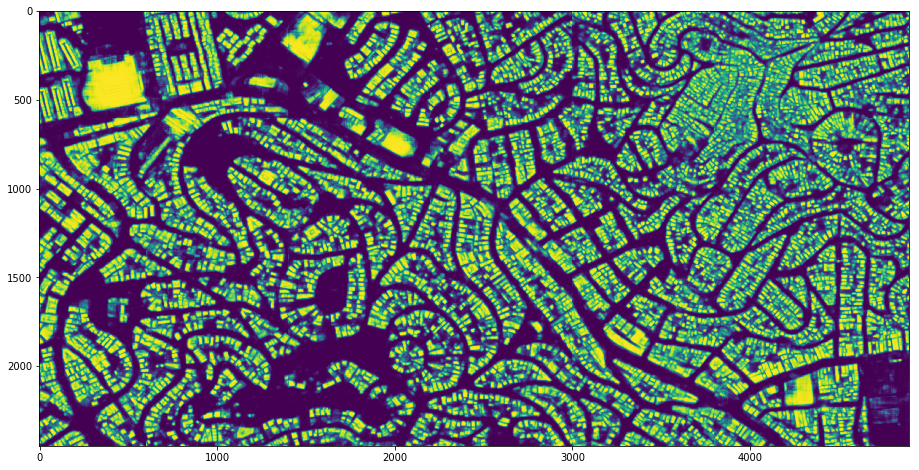

In [7]:
# Show!
plt.figure(figsize=(16,8))
plt.imshow(score[1])

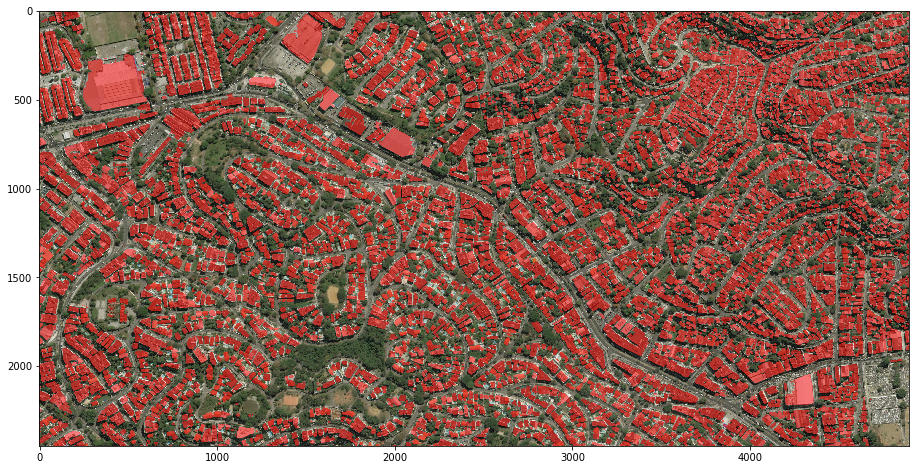

In [8]:
# Overlay predicted building mask on mosaic
building_mask = (np.argmax(score, axis=0) == 1)
overlay = overlay_mask(mosaic, building_mask)

plt.figure(figsize=(16,8))
plt.imshow(overlay)